### Part (b): Moving Average Filtering of White Noise Time Series
### Read M (>1) as an input. 
### Filter the white noise time series with M-tap Moving Average Filter & 
### generate another time series{Yt} = {(Wt +Wt-1+-….+Wt-(M-1))/M}. 
### Plot the filtered data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42) 

N = 2000
mean = 0
variance = 1
std_dev = np.sqrt(variance)

time_index = np.arange(0, N)
Wt = np.random.normal(mean, std_dev, N)

global_mean = np.mean(Wt)
global_variance = np.var(Wt)

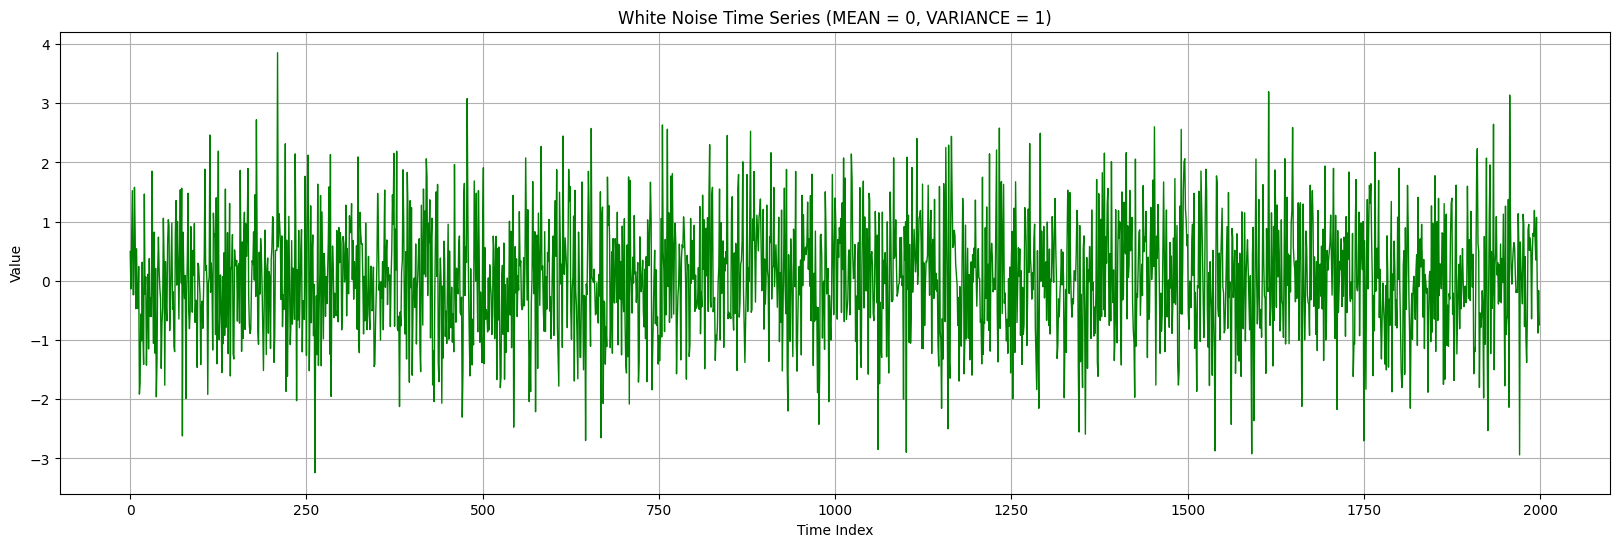

In [3]:

plt.figure(figsize=(20, 6)) #,facecolor='yellow',edgecolor='red')

plt.plot(time_index, Wt, color='green', linewidth=1)
plt.title("White Noise Time Series (MEAN = 0, VARIANCE = 1)")
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

#### Chunk-wise Analysis

In [4]:
chunk_size = 100
num_chunks = N // chunk_size

chunk_means = []
chunk_variances = []
chunk_indices = []

for i in range(num_chunks):
    chunk = Wt[i * chunk_size:(i + 1) * chunk_size]
    chunk_means.append(np.mean(chunk))
    chunk_variances.append(np.var(chunk))
    chunk_indices.append(i + 1)


In [5]:
M = int(input("Enter the value of M (M > 1): "))
print(f"Applying Moving Average Filter with M = {M}")


Applying Moving Average Filter with M = 20


In [6]:
# Number of valid output samples
L = N - (M - 1)

# Initialize output
Yt = np.zeros(L)

# Time indices using np.arange
t = np.arange(L)

# Moving Average computation using indexing
for k in range(M):
    Yt += Wt[t + k]

Yt = Yt / M

# Time index for filtered signal
time_index_Y = np.arange(L)

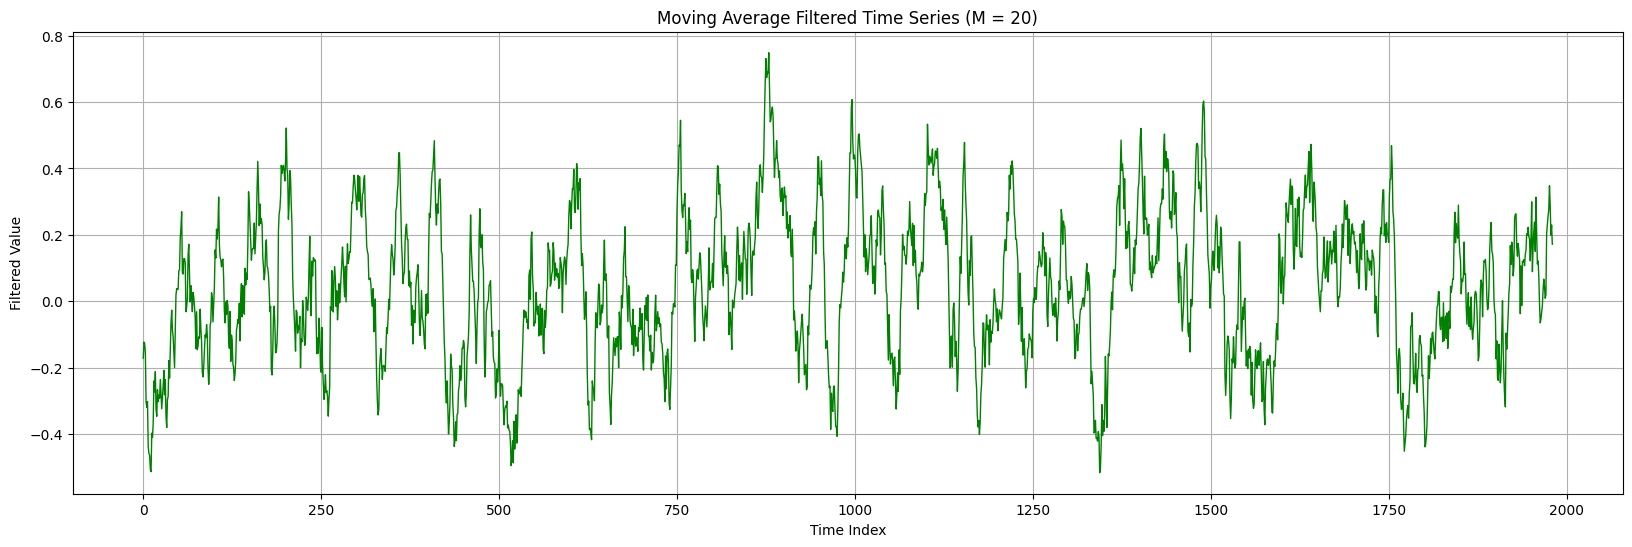

In [7]:
# Filtered time series
plt.figure(figsize=(20, 6))
plt.plot(time_index_Y, Yt, color='green', linewidth=1)
plt.title(f"Moving Average Filtered Time Series (M = {M})")
plt.xlabel("Time Index")
plt.ylabel("Filtered Value")
plt.grid(True)
plt.show()

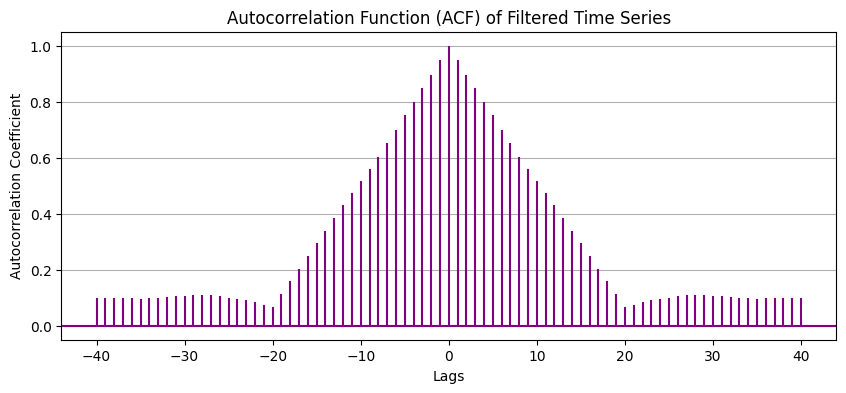

In [8]:
# ACF of filtered time series
plt.figure(figsize=(10, 4))
plt.acorr(Yt, maxlags=40, linestyle='-', color='purple')
plt.title("Autocorrelation Function (ACF) of Filtered Time Series")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation Coefficient")
plt.grid(True, axis='y')
plt.show()